__Authors__: Federica Papa, Francesco Daquino, Francesco Maggio, Ondrej Krasnansky, Sandro Cantasano Martino. 

---
# Topic Modeling


In [7]:
# !pip install pyLDAvis

In [96]:
#libraries
import random
import numpy as np
import matplotlib as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
import gensim
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
df=pd.read_csv("df_preprocessed.csv")
df = df.dropna()
df.head()

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,119,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccordo...,Prof di latino e Deputata PDAma lo sport la Ro...,254,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema d'Autore Musica ...,256,41,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere all'opini...,nodescription,247,39,"['Lega', 'm5s', 'dando', 'bere', ""all'opinione...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'a il', 'opini...","['leg', 'm5s', 'dand', 'ber', ""all'opinion"", '...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decre...,Veneto Assessore Regionale Sviluppo Economico ...,192,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0


In [98]:
df['clean_anonymized_description'].value_counts()

clean_anonymized_description
nodescription                                                                                                                                               1299
Zazoom Social News Tutte le notizie dalle migliori fonti del web Segnala il tuo Blog Zazoom Social News è un un'idea che aiuta a dar voce al tuo sito         77
Web addicted e Consulente ECommerce SEO Social URL                                                                                                            50
URL                                                                                                                                                           41
Vero che non ne siamo usciti migliori ma cè da dire che ceravamo entrati già problematici                                                                     40
                                                                                                                                                            ... 
Appas

In [99]:
#suddivione dataframe tra hate e non hate speech

df_no_hate=df[df["is_hate_speech"]== 0]
df_hate=df[df["is_hate_speech"]== 1]

# Topic Modeling on NON hate_speech dataset and clean_anonymized_description column

In [100]:
#text cleaning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')
en_stopwords = stopwords.words('italian')
stopwords_1=['url','perch','nodescription'] + list(en_stopwords) + english_stopwords  

# vectorization
tf_vectorizer = CountVectorizer(stop_words=stopwords_1, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))

# Learn the vocabulary dictionary and return document-term matrix.
texts = df_no_hate.loc[df_no_hate["clean_anonymized_description"] != "nodescription", "clean_anonymized_description"]
tf = tf_vectorizer.fit_transform(texts)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 4

lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=4, n_jobs=-1, verbose=1)

In [102]:
#function for printing n_top_words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [103]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: solo, ufficiale, sinistra, informazione, twitter, politica, tempo, dio, opinioni, profilo, account, mai, essere, sempre, presidente, roma, giornalista, due, qui, nazionale

Topic 1: news, notizie, social, social news, zazoom social, zazoom, vita, tutte, sito, blog, migliori, web, idea, fonti, tutte notizie, aiuta, voce, dar, voce sito, idea aiuta

Topic 2: giornalista, politica, amo, de, senza, libri, radio, arte, sport, ciò, musica, ogni, satira, sempre, grande, tv, anni, italia, scrivo, online

Topic 3: sempre, italia, politica, mondo, social, consulente, avvocato, essere, italiano, web, repubblica, italian, vita, addicted, ogni, ecommerce, ecommerce seo, addicted consulente, web addicted, seo



In [104]:
import pyLDAvis
import pyLDAvis.lda_model

In [105]:
pyLDAvis.enable_notebook()

In [106]:
pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.085027 -0.190115       1        1  26.607002
0     -0.103470 -0.075179       2        1  25.392885
2     -0.125129  0.244207       3        1  24.096456
1      0.313626  0.021087       4        1  23.903657, topic_info=               Term        Freq       Total Category  logprob  loglift
1790           news  251.000000  251.000000  Default  30.0000  30.0000
3177  zazoom social  148.000000  148.000000  Default  29.0000  29.0000
3176         zazoom  148.000000  148.000000  Default  28.0000  28.0000
2677    social news  148.000000  148.000000  Default  27.0000  27.0000
1823        notizie  241.000000  241.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
47            aiuta   77.899649   87.891823   Topic4  -4.8819   1.3105
1823        notizie  191.549792  241.819515   Topic4  -3.9821   1.1981
2675         social  156.213542  235.195674   Topic4  -4.1861   1.0219
3102           vita  108.549848  162.505322   Topic4  -4.5501   1.0276
3150            web   96.929682  153.730704   Topic4  -4.6633   0.9699

[227 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
9         1  0.317134            account
9         2  0.590525            account
9         3  0.087485            account
11        2  0.966796  account ufficiale
15        1  0.992893           addicted
...     ...       ...                ...
3150      4  0.630973                web
3151      1  0.983322       web addicted
3152      4  0.989510        web segnala
3176      4  0.995713             zazoom
3177      4  0.995713      zazoom social

[280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

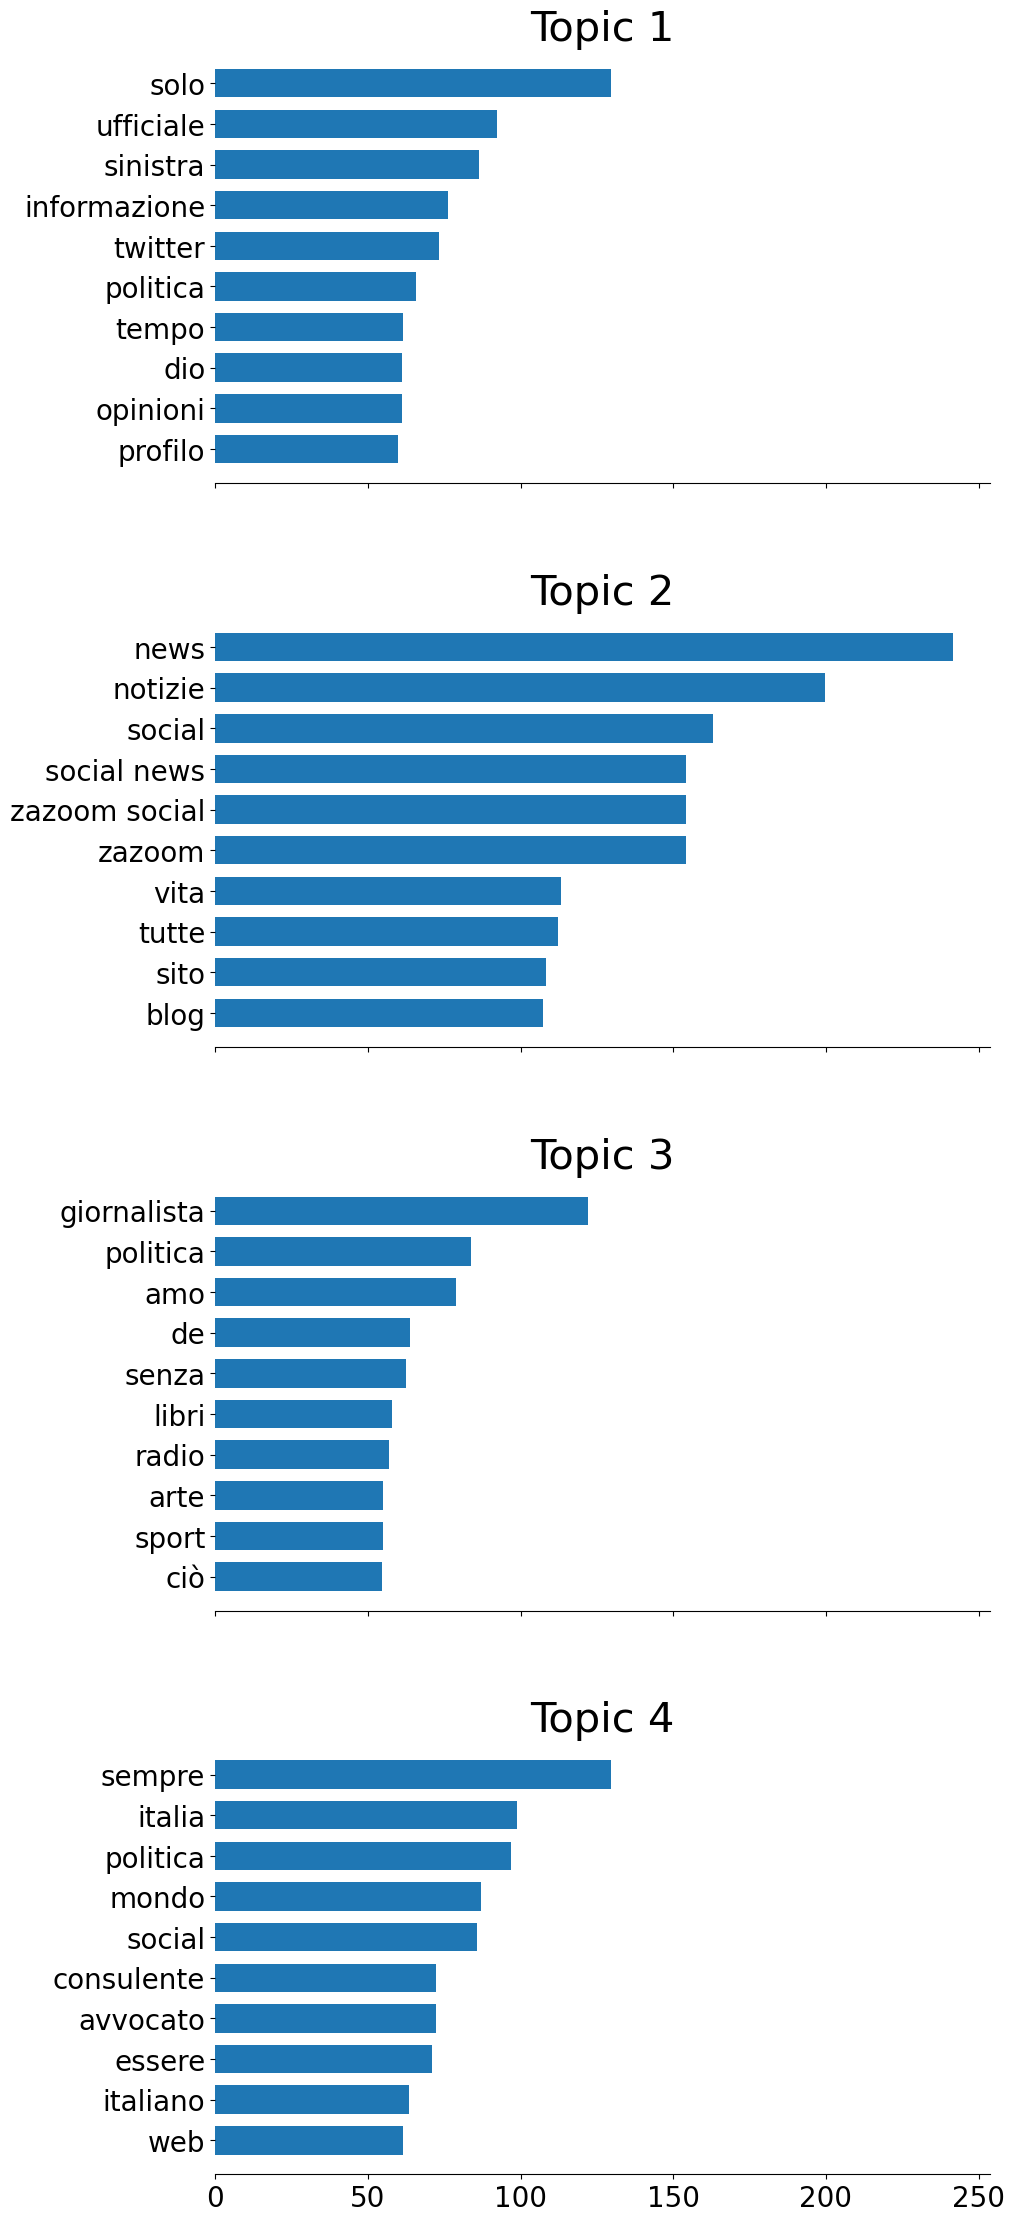

In [107]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4,1, figsize=(10, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, '')

## Topic Modeling on hate_speech dataset and anonymized_description column

In [113]:
#text cleaning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')
en_stopwords = stopwords.words('italian')
stopwords_1=['url','perch','nodescription'] + list(en_stopwords) + english_stopwords 

# vectorization
tf_vectorizer = CountVectorizer(stop_words=stopwords_1, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))

# Learn the vocabulary dictionary and return document-term matrix.
texts = df_hate.loc[df_hate["clean_anonymized_description"] != "nodescription", "clean_anonymized_description"]
tf = tf_vectorizer.fit_transform(texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 4

lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=4, n_jobs=-1, verbose=1)

In [115]:
#function for printing n_top_words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [116]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: antifascista, sempre, italiano, mondo, politica, amo, antirazzista, senza, scrivo, vita, italian, fare, antifascista antirazzista, qui, dio, lega, social, soprattutto, vaccinato, ex

Topic 1: destra, odio, sinistra, sempre, solo, persone, dm, antifascista, razzisti, amo, già, love, vero, fa, novax, ogni, posso, figlio, dire, nogreenpass

Topic 2: prima, può, essere, vaccino, moderna, dose, right, vaccino moderna, dose vaccino, verità, tempo, piace, poi, evviva, right right, stato, italiani, ignoranza, italia, cose

Topic 3: solo, libertà, satira, mai, vita, idea, causa, autrice, rendo, causa inutilizzo, rendo idea, satira solo, inutilizzo autrice, idea causa, autrice satira, inutilizzo, viene, nulla, italia, account



In [117]:
pyLDAvis.enable_notebook()

In [118]:
pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.165505  0.090113       1        1  26.806423
2      0.039268 -0.294595       2        1  25.706125
3      0.274876  0.134296       3        1  24.563445
0     -0.148639  0.070186       4        1  22.924007, topic_info=          Term        Freq       Total Category  logprob  loglift
707    libertà   62.000000   62.000000  Default  30.0000  30.0000
663   italiano   52.000000   52.000000  Default  29.0000  29.0000
1071     prima   54.000000   54.000000  Default  28.0000  28.0000
1099       può   51.000000   51.000000  Default  27.0000  27.0000
1241    sempre  102.000000  102.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
302      cuore   20.508075   30.962121   Topic4  -5.2899   1.0610
456       fare   24.231094   52.123476   Topic4  -5.1231   0.7070
1495      vita   26.019436   74.421507   Topic4  -5.0519   0.4221
985         pd   18.998673   29.098766   Topic4  -5.3664   1.0467
1210    satira   19.348484   80.134334   Topic4  -5.3481   0.0519

[208 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         2  0.988792          15maggio
1         2  0.988792  15maggio seconda
5         2  0.330455           account
5         3  0.660910           account
28        1  0.969532              alto
...     ...       ...               ...
1495      3  0.644975              vita
1495      4  0.349361              vita
1532      3  0.962422        washington
1545      1  0.969528             zecca
1546      1  0.963203       zecca rossa

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

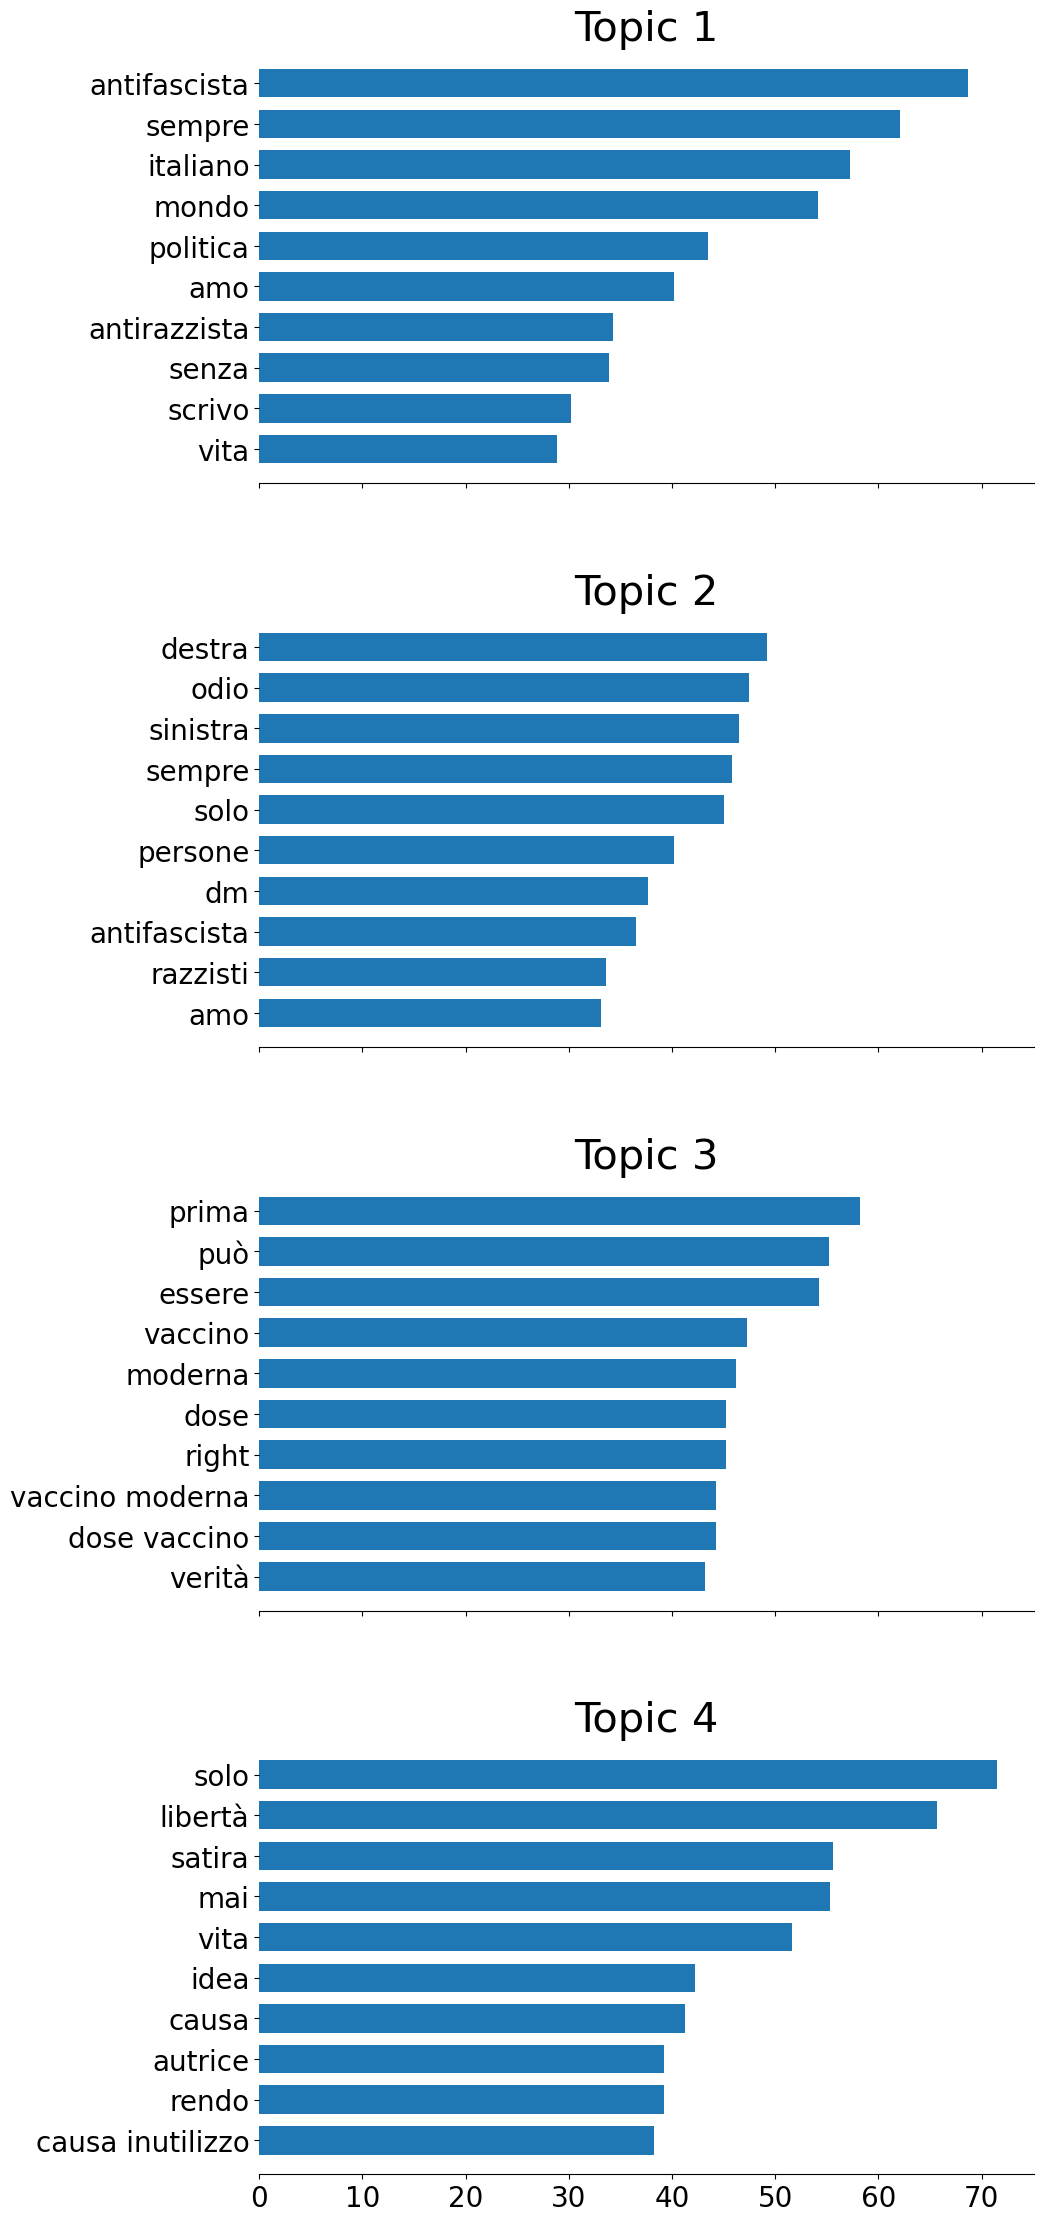

In [119]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4,1, figsize=(10, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, '')

# TOPIC MODELLING splitting RELIGIOUS and POLITICS domain

In [120]:
df_politics=df[df["dataset"]==0]
df_religious=df[df["dataset"]==1]

## politics

In [121]:
documents = df_politics[df_politics["clean_anonymized_description"] != "nodescription"]["clean_anonymized_description"].apply(lambda x: x.split() if isinstance(x, str) else [])
dictionary = corpora.Dictionary(documents)

In [122]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

In [123]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=2,\
                   iterations=10, chunksize = 100, eval_every = None)

    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=documents,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [124]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

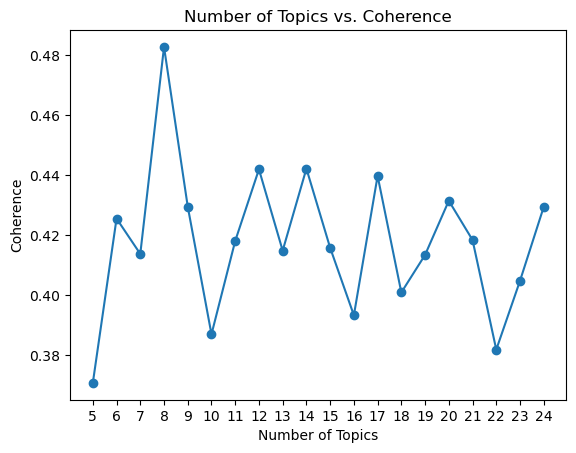

In [125]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [126]:
# Learn the vocabulary dictionary and return document-term matrix.
texts_politics = df_politics.loc[df_politics["clean_anonymized_description"] != "nodescription", "clean_anonymized_description"]
tf_politics = tf_vectorizer.fit_transform(texts_politics)

from sklearn.decomposition import LatentDirichletAllocation

n_components = 8

lda_politics = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda_politics.fit(tf_politics)
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_politics,tf_politics,tf_vectorizer)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.352877 -0.121227       1        1  14.334833
7      0.012256  0.112307       2        1  13.680747
2      0.052834  0.277680       3        1  13.491482
5     -0.093391 -0.061447       4        1  13.017396
6     -0.035106  0.074040       5        1  12.852157
4     -0.075249 -0.179607       6        1  11.440799
0     -0.128553 -0.031711       7        1  10.825151
3     -0.085669 -0.070035       8        1  10.357434, topic_info=               Term        Freq       Total Category  logprob  loglift
2194           news  210.000000  210.000000  Default  30.0000  30.0000
3901  zazoom social  144.000000  144.000000  Default  29.0000  29.0000
3900         zazoom  144.000000  144.000000  Default  28.0000  28.0000
3292    social news  144.000000  144.000000  Default  27.0000  27.0000
3289         social  247.000000  247.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
2695     presidente   28.721244   87.228229   Topic8  -5.2693   1.1566
3188         sempre   33.568690  250.954891   Topic8  -5.1134   0.2558
1397    giornalista   28.433386  154.631693   Topic8  -5.2794   0.5740
2613       politica   24.890676  254.658022   Topic8  -5.4125  -0.0580
1771         lavoro   22.766868   82.277863   Topic8  -5.5016   0.9827

[438 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
0         5  0.971888        1025digital
1         5  0.971888  1025digital radio
16        1  0.048220            account
16        4  0.120551            account
16        6  0.470147            account
...     ...       ...                ...
3871      8  0.973434       web addicted
3873      1  0.993354        web segnala
3900      1  0.992839             zazoom
3901      1  0.992839      zazoom social
3904      2  0.947183       zenzeroncino

[695 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 3, 6, 7, 5, 1, 4])

In [127]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda_politics, tf_feature_names, n_top_words)


Topic 0: avvocato, italiana, passione, satira, presidente, scemo, repubblica, sinistra, lega, instagram, amo, scemo scemo, europa, gruppo, autore, pro, libro, romanista, legge, commissione

Topic 1: news, social, zazoom social, social news, zazoom, notizie, tutte, blog, web, sito, idea, fonti, voce, migliori, aiuta, tutte notizie, web segnala, news tutte, segnala, idea aiuta

Topic 2: dire, cè, già, politica, causa, autrice, solo, amo, vero, satira, rendo, idea, dire ceravamo, ceravamo, ceravamo entrati, vero usciti, usciti migliori, entrati, entrati già, già problematici

Topic 3: consulente, web, libero, addicted, social, stelle, seo, ecommerce, web addicted, consulente ecommerce, ecommerce seo, addicted consulente, seo social, movimento, liberale, destra, sempre, senatore, twitter, account

Topic 4: antifascista, antirazzista, opinioni, viene, account, nulla, italiano, personali, parola, essere, solo, antifascista antirazzista, libertà, opinioni personali, pecore, political, cuore,

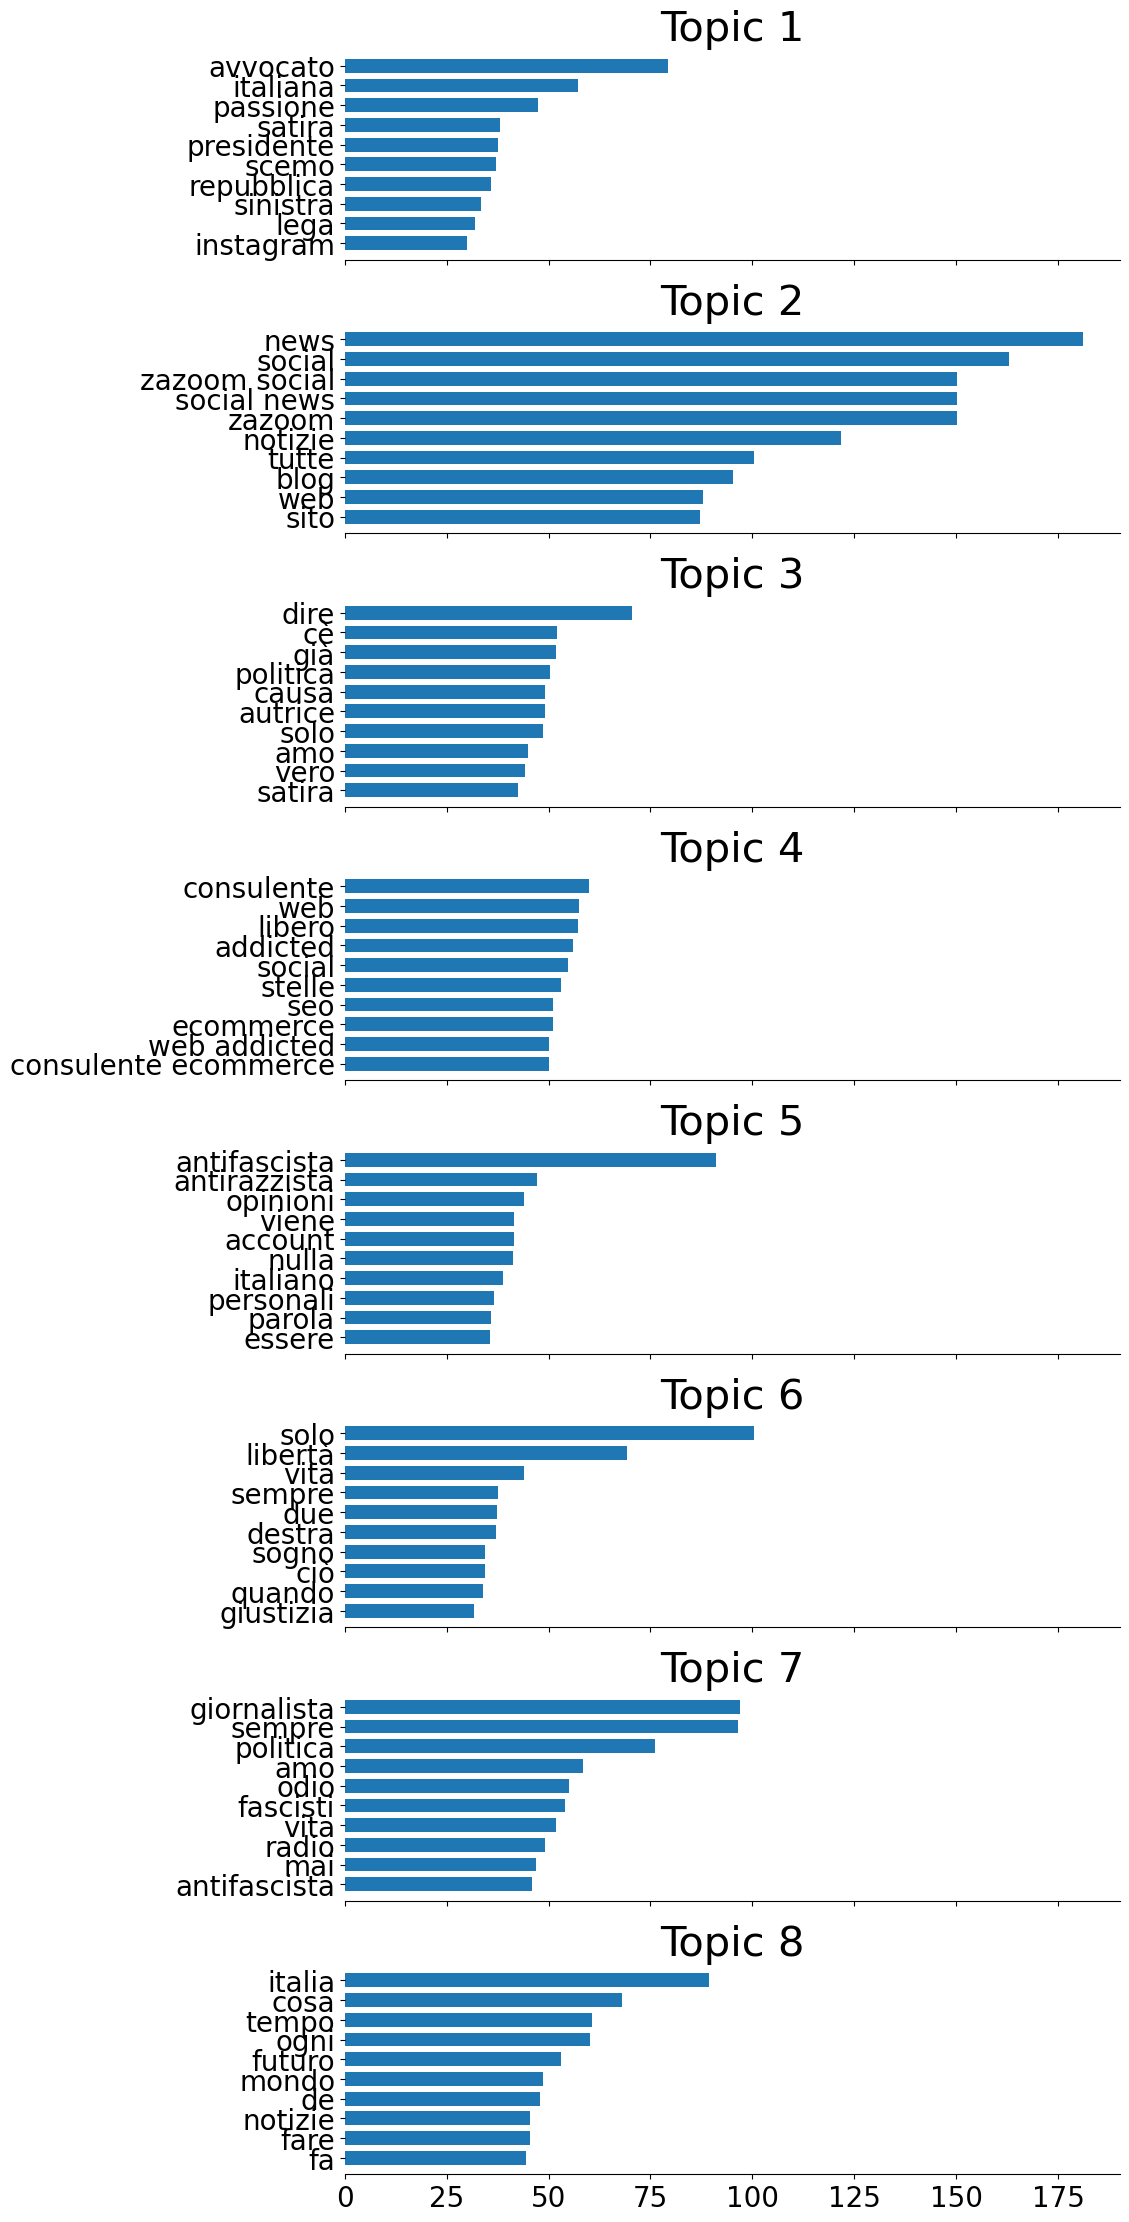

In [129]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(8,1, figsize=(10, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda_politics, tf_feature_names, n_top_words, '')

## religious

In [130]:
documents = df_religious[df_religious["clean_anonymized_description"] != "nodescription"]["clean_anonymized_description"].apply(lambda x: x.split() if isinstance(x, str) else [])
dictionary = corpora.Dictionary(documents)

In [131]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

In [132]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=2,\
                   iterations=10, chunksize = 100, eval_every = None)

    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=documents,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [133]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

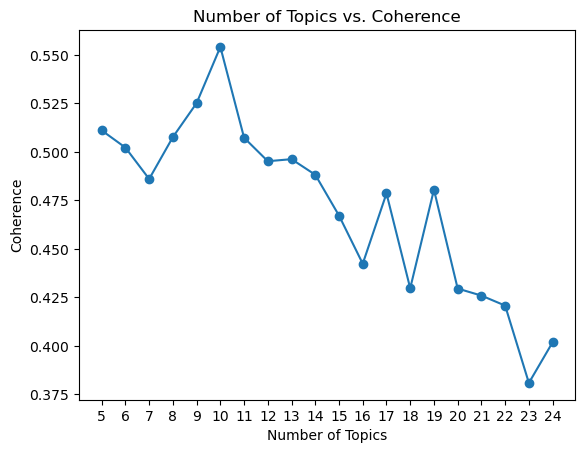

In [134]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [135]:
# Learn the vocabulary dictionary and return document-term matrix.
texts_religious = df_religious.loc[df_religious["clean_anonymized_description"] != "nodescription", "clean_anonymized_description"]
tf_religious = tf_vectorizer.fit_transform(texts_religious)

from sklearn.decomposition import LatentDirichletAllocation

n_components = 10

lda_religious = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda_religious.fit(tf_religious)
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_religious,tf_religious,tf_vectorizer)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.091549 -0.005056       1        1  10.961652
5     -0.333433  0.068908       2        1  10.455029
3     -0.095127 -0.074607       3        1  10.406104
6      0.072687  0.019261       4        1  10.387615
0      0.168002  0.231215       5        1  10.353391
4      0.032441 -0.045755       6        1  10.344716
7      0.007937 -0.197912       7        1   9.829556
9      0.058500 -0.137909       8        1   9.705890
8      0.056977 -0.037205       9        1   8.864707
1     -0.059534  0.179060      10        1   8.691342, topic_info=          Term       Freq      Total Category  logprob  loglift
1005      vita  63.000000  63.000000  Default  30.0000  30.0000
850     sheher  54.000000  54.000000  Default  29.0000  29.0000
43        anti  41.000000  41.000000  Default  28.0000  28.0000
689   politica  48.000000  48.000000  Default  27.0000  27.0000
225        dio  69.000000  69.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
388   giovanni   6.647539   8.377726  Topic10  -4.8900   2.2115
14        also   7.583910  11.020565  Topic10  -4.7582   2.0691
517      luogo   6.525292   8.344170  Topic10  -4.9086   2.1970
966     uomini   6.647402   9.310343  Topic10  -4.8900   2.1059
948      tutte   7.425320  14.613261  Topic10  -4.7794   1.7658

[519 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         3  0.930491  1corinti
1         4  0.171235   account
1         5  0.532733   account
1         8  0.133183   account
1         9  0.152209   account
...     ...       ...       ...
1019      8  0.060016     volte
1019     10  0.240064     volte
1026      1  0.598246       web
1026      5  0.373904       web
1028      3  0.797907   without

[750 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 7, 1, 5, 8, 10, 9, 2])

In [136]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda_religious, tf_feature_names, n_top_words)


Topic 0: dio, news, account, figlia, figlia dio, notizie, italian, fan, lover, fan account, inter, blog, due, informazione, cattolica, former, reale, servizio, chiesa, historian

Topic 1: anti, anni, tempo, politiche, nwo, persone, sinistre, europeiste fallimentari, europeiste, anti politiche, sinistre europeiste, anti nwo, politiche sinistre, fallimentari anti, fallimentari, via, anima, san, great, turismo

Topic 2: sheher, politica, notizie, de, love, informazione, storia, musica, et, arte, sport, israele, tecnologia, les, italiano, economia, attualità, mondo, generale, social

Topic 3: vita, solo, essere, sa, può, altri, cose, nessuno, hehim, destra, guerra, sapere, libero, cattolico, migliore, storie, qualcosa, pace, fatti, mondo

Topic 4: sempre, libertà, son, verso, dio, quel, storia, god, parole, ragione, fuori, amo, sinistra, penso, rispetto, quindi, vivere, natura, filosofia, posso

Topic 5: essere, popolo, ex, altro, universo, giornalista, dire, corpo, fine, tipo, dovrei, sc

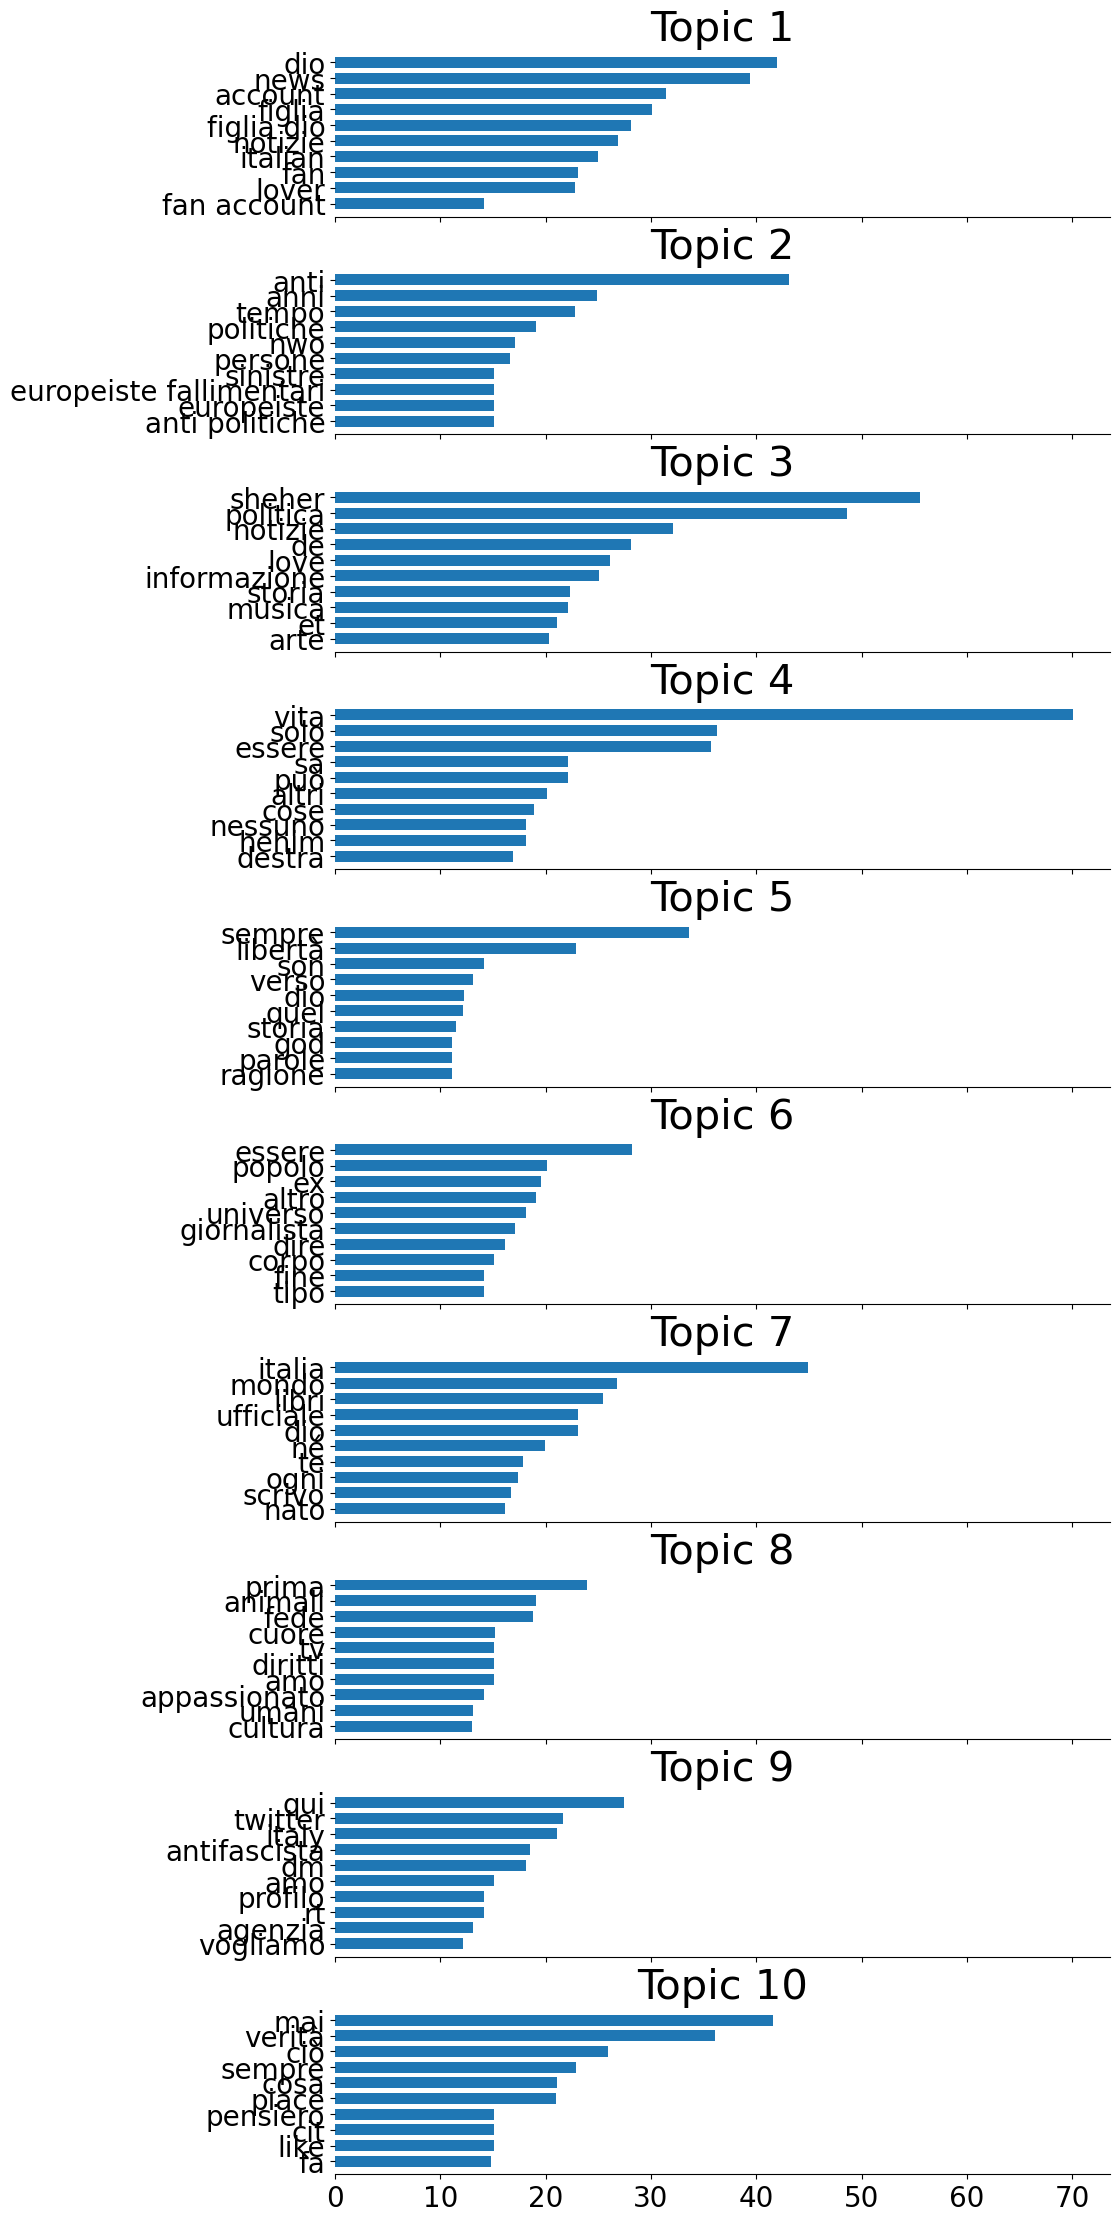

In [137]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(10,1, figsize=(10, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda_religious, tf_feature_names, n_top_words, '')

## ENTIRE DATASET

In [138]:
documents = df["clean_tweet"].apply(lambda x: x.split() if isinstance(x, str) else [])
dictionary = corpora.Dictionary(documents)

In [139]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

In [140]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=2,\
                   iterations=10, chunksize = 100, eval_every = None)

    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=documents,\
                                                     dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [141]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

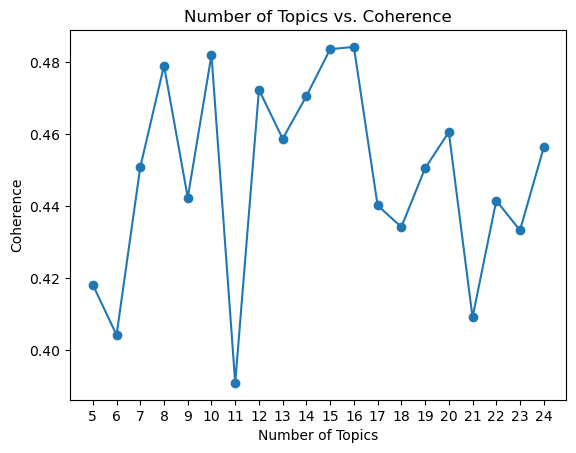

In [142]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [143]:
# Learn the vocabulary dictionary and return document-term matrix.
documents = df.loc[df["clean_tweet"].notnull(), "clean_tweet"]

tf_dataset = tf_vectorizer.fit_transform(documents)

from sklearn.decomposition import LatentDirichletAllocation

n_components = 8

lda_dataset = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda_dataset.fit(tf_dataset)
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_dataset,tf_dataset,tf_vectorizer)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.122578 -0.073105       1        1  16.901241
4     -0.173721 -0.010472       2        1  15.613665
1     -0.069307  0.050879       3        1  12.283105
5      0.022134 -0.052172       4        1  12.133644
0      0.101310 -0.094886       5        1  11.615702
2      0.132093  0.256072       6        1  10.805964
6     -0.212616  0.022309       7        1  10.371927
7      0.077529 -0.098626       8        1  10.274751, topic_info=           Term         Freq        Total Category  logprob  loglift
1644     draghi   502.000000   502.000000  Default  30.0000  30.0000
4510    salvini  1341.000000  1341.000000  Default  29.0000  29.0000
3601         pd   392.000000   392.000000  Default  28.0000  28.0000
1684      ebrei   540.000000   540.000000  Default  27.0000  27.0000
1249  cristiani   612.000000   612.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4910       solo    54.805863   642.543767   Topic8  -5.4100  -0.1862
2693     lavoro    37.844306   154.142604   Topic8  -5.7803   0.8711
3462      paese    43.703745   282.674201   Topic8  -5.6363   0.4086
5047      stato    44.618831   417.857498   Topic8  -5.6156   0.0385
5418         va    37.264949   188.660857   Topic8  -5.7957   0.6536

[605 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
19        1  0.467215    25aprile
19        3  0.258765    25aprile
19        5  0.086255    25aprile
19        6  0.150946    25aprile
19        7  0.028752    25aprile
...     ...       ...         ...
5665      4  0.033317  zingaretti
5665      5  0.066634  zingaretti
5673      6  0.952845  zonagialla
5674      3  0.829237   zonarossa
5674      7  0.130932   zonarossa

[1261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 6, 1, 3, 7, 8])

In [144]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda_dataset, tf_feature_names, n_top_words)


Topic 0: salvini, legge, salvinisciacallo, euro, m5s, governo, dopo, decreto, salvinipagliaccio, facciamorete, ora, prima, anno, elettorale, cazzaroverde, fatto, milioni, parlamentari, legaladrona, lavoro

Topic 1: solo, covid19, cristiani, senza, dpcm, essere, oggi, covid, coronavirus, sinistra, cosa, chiesa, conte, ebrei, italia, sempre, fare, vaccini, mai, prima

Topic 2: draghi, speranzadimettiti, governodeipeggiori, coprifuoco, speranzavattene, speranza, governo, ministro, pnrr, parlamento, recoveryplan, salute, covid, governodellavergogna, piano, legamerda, giorgiameloni, dldittatura, consiglio, nocoprifuoco

Topic 3: salvini, m5s, governo, lega, pd, conte, salvinipagliaccio, italiani, renzi, salviniportasfiga, essere, fatto, solo, quando, italia, partito, fa, meloni, senza, cosa

Topic 4: cristiani, ebrei, anni, legge, poi, islamico, cosa, donne, stato, solo, quando, prima, fare, mai, parte, essere, fa, così, ebreo, può

Topic 5: conte, salvini, ancora, poi, ogni, bene, governo

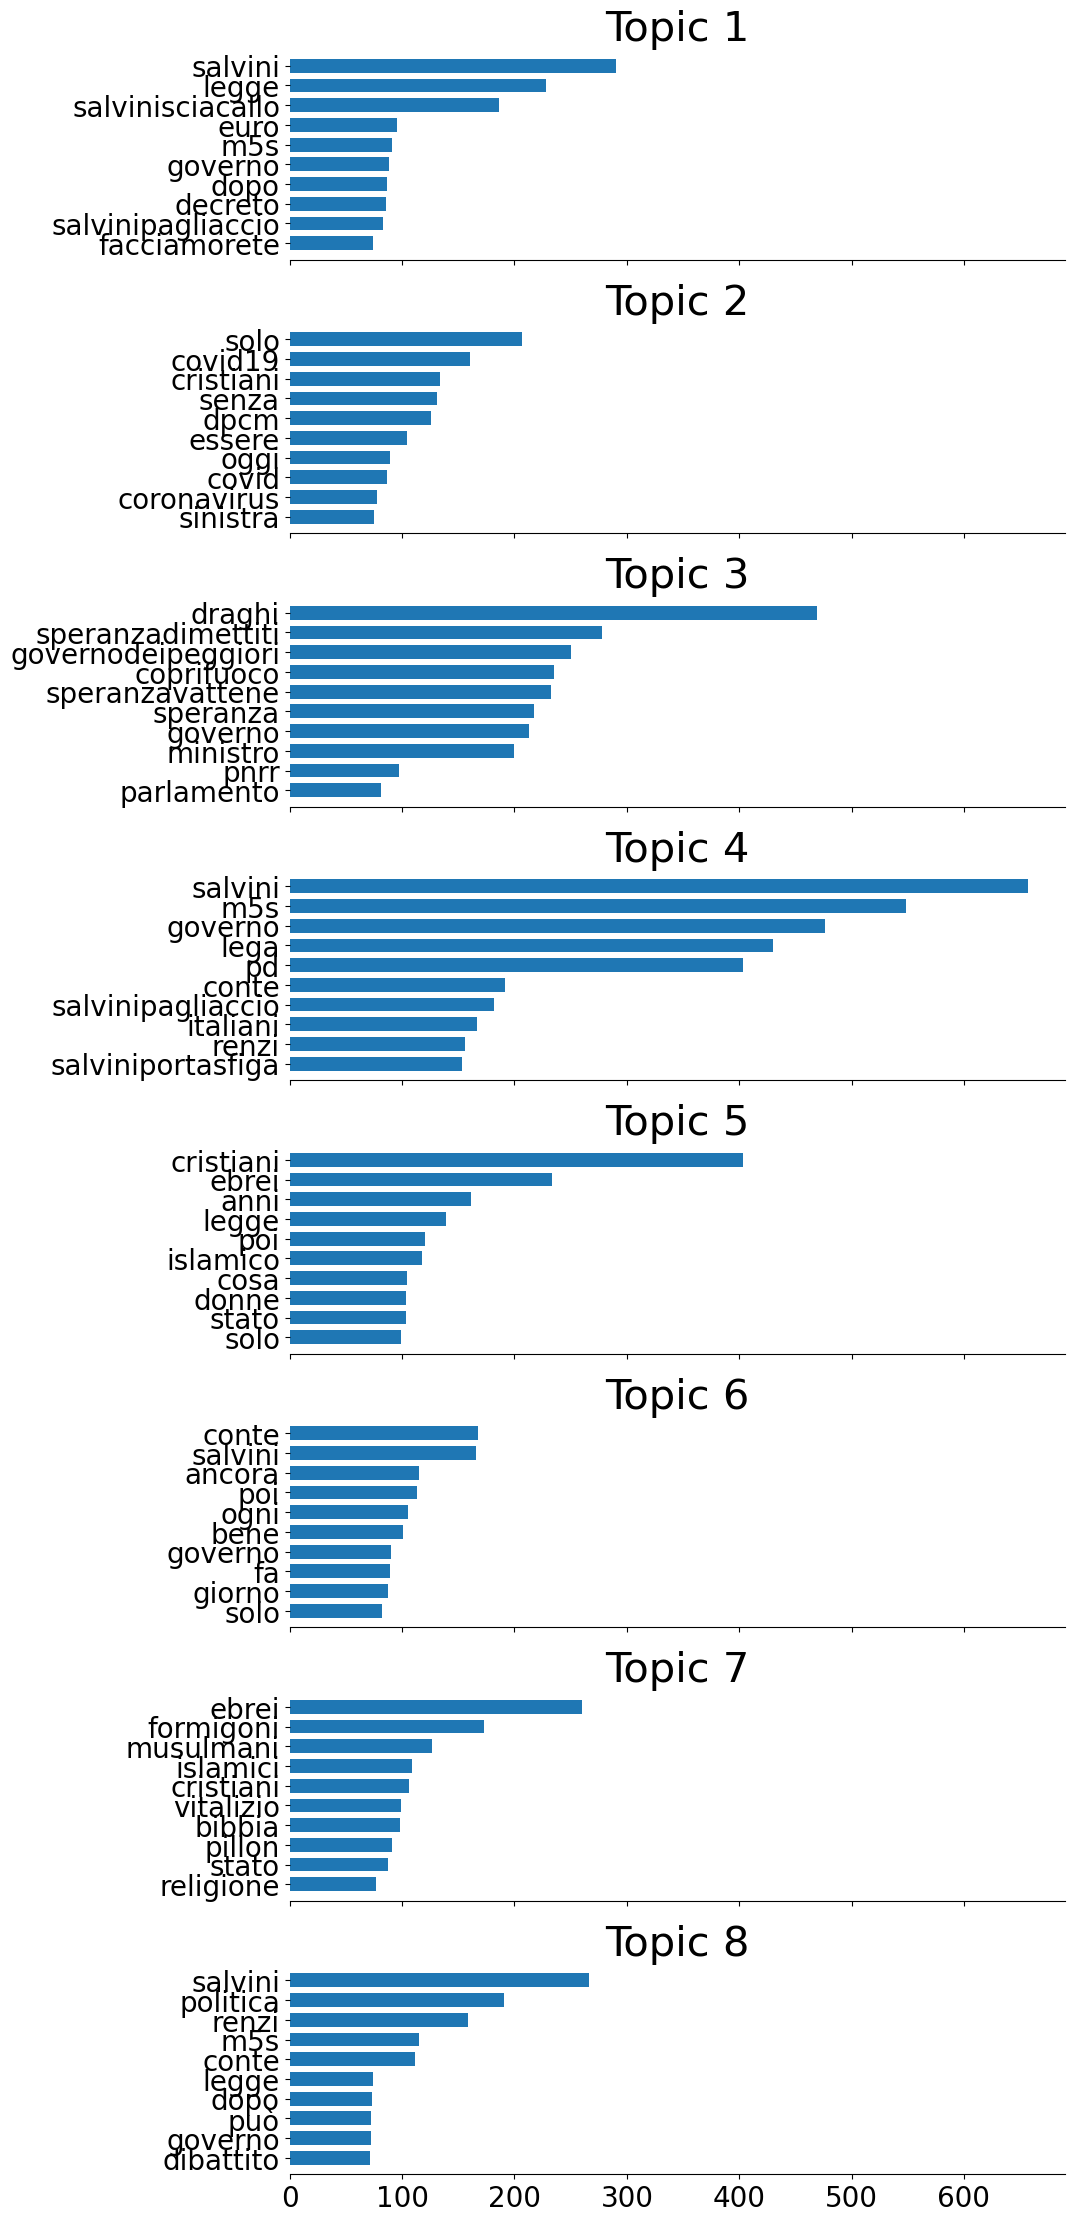

In [146]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(8,1, figsize=(10, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda_dataset, tf_feature_names, n_top_words, '')